In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_excel("Walmart_Store_sales.xlsx")

In [4]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


## Basic data processing

In [5]:
df.dtypes
df['ConvertedDate']=df['Date'].astype(str)
df
df.dtypes

Store                     int64
Date             datetime64[ns]
Weekly_Sales            float64
Holiday_Flag              int64
Temperature             float64
Fuel_Price              float64
CPI                     float64
Unemployment            float64
ConvertedDate            object
dtype: object

In [257]:
df
df = df.sort_values(by="Date")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,ConvertedDate,Find duplicate
0,1,2010-02-05,1643690.90000,0,42.31000,2.57200,211.09636,8.10600,2010-02-05,2010-02-05-1-1643690.9
5148,37,2010-02-05,536006.73000,0,45.97000,2.57200,209.85297,8.55400,2010-02-05,2010-02-05-37-536006.73
2288,17,2010-02-05,789036.02000,0,23.11000,2.66600,126.44206,6.54800,2010-02-05,2010-02-05-17-789036.02
4147,30,2010-02-05,465108.52000,0,39.05000,2.57200,210.75261,8.32400,2010-02-05,2010-02-05-30-465108.52
3432,25,2010-02-05,677231.63000,0,21.10000,2.78400,204.24719,8.18700,2010-02-05,2010-02-05-25-677231.63
...,...,...,...,...,...,...,...,...,...,...
714,5,2012-10-26,319550.77000,0,71.70000,3.50600,224.03781,5.42200,2012-10-26,2012-10-26-5-319550.77
6291,44,2012-10-26,361067.07000,0,46.97000,3.75500,131.19310,5.21700,2012-10-26,2012-10-26-44-361067.07
5004,35,2012-10-26,865137.60000,0,58.99000,3.88200,142.76241,8.66500,2012-10-26,2012-10-26-35-865137.6
5719,40,2012-10-26,921264.52000,0,49.65000,3.91700,138.72816,4.14500,2012-10-26,2012-10-26-40-921264.52


In [258]:
df.isna().sum()

Store             0
Date              0
Weekly_Sales      0
Holiday_Flag      0
Temperature       0
Fuel_Price        0
CPI               0
Unemployment      0
ConvertedDate     0
Find duplicate    0
dtype: int64

In [6]:
df["Find duplicate"] = df["ConvertedDate"].str.cat(df[["Store","Weekly_Sales"]].astype(str), sep = "-")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,ConvertedDate,Find duplicate
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,2010-02-05-1-1643690.9
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,2010-02-12-1-1641957.44
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,2010-02-19-1-1611968.17
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,2010-02-26-1-1409727.59
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,2010-03-05-1-1554806.68
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012-09-28,2012-09-28-45-713173.95
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012-10-05,2012-10-05-45-733455.07
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012-10-12,2012-10-12-45-734464.36
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012-10-19,2012-10-19-45-718125.53


In [7]:
df = df.drop_duplicates(subset="Find duplicate", keep="last")

## Store 1 Data Selection 

In [8]:
filt_1 = (df["Store"] == 1) 
df1 = df.loc[filt_1]
df1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,ConvertedDate,Find duplicate
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,2010-02-05-1-1643690.9
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,2010-02-12-1-1641957.44
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,2010-02-19-1-1611968.17
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,2010-02-26-1-1409727.59
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,2010-03-05-1-1554806.68
...,...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,2012-09-28,2012-09-28-1-1437059.26
139,1,2012-10-05,1670785.97,0,68.55,3.617,223.181477,6.573,2012-10-05,2012-10-05-1-1670785.97
140,1,2012-10-12,1573072.81,0,62.99,3.601,223.381296,6.573,2012-10-12,2012-10-12-1-1573072.81
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,2012-10-19,2012-10-19-1-1508068.77


In [9]:
df1
df1["Month_year"] = df1["ConvertedDate"].str.slice(-10,7)
df1
df1 = df1.sort_values(by="Date")
df1 = df1.groupby ("Month_year").sum().sort_values(by=["Month_year"])
df1

C:\Users\dhuy9\AppData\Local\Temp\ipykernel_6880\45521554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Month_year"] = df1["ConvertedDate"].str.slice(-10,7)


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Month_year,,,,,,,
2010-02,4,6307344.10,1,167.38,10.195,844.947314,32.424
2010-03,4,5871293.98,0,210.32,10.744,844.964463,32.424
2010-04,5,7422801.92,0,326.70,13.872,1052.760676,39.040
2010-05,4,5929938.64,0,304.21,11.274,842.191249,31.232
2010-06,4,6084081.46,0,329.57,10.663,845.424947,31.232
2010-07,5,7244483.04,0,409.74,13.182,1056.037380,38.935
2010-08,4,6075952.95,0,346.03,10.602,846.314752,31.148
2010-09,4,5829793.92,1,322.95,10.348,846.146122,31.148
2010-10,5,7150641.75,0,342.50,13.397,1059.002625,39.190


## Correlation Study between Sales and Holiday Flag

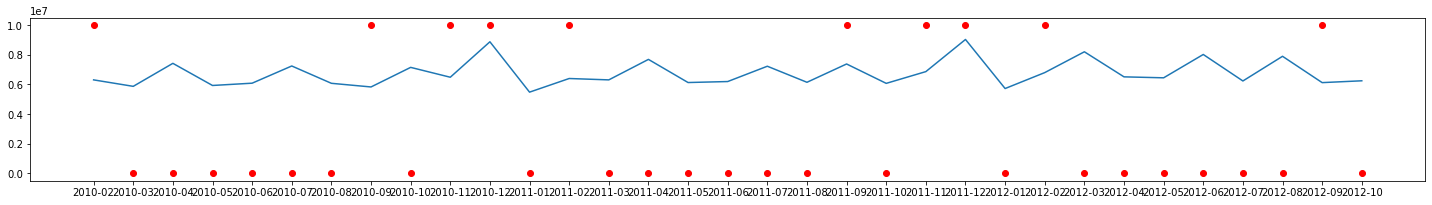

In [10]:
plt.figure(figsize=(25,3))
plt.plot(df1["Weekly_Sales"])
plt.scatter(df1.index,df1["Holiday_Flag"]*9999999, color='r')

In [12]:
df1["Weekly_Sales"].corr(df1["Holiday_Flag"])

0.2000794864603993

### So it is obvious by chart and statistics that the correlation between Sales and Holiday Flag is weak. We can exclude Holiday Flag out of the dataset. No need for ARIMAX 

## Stat tests for parameters selection of ARIMA 

In [13]:
ts = df1[['Weekly_Sales']]
ts

,Weekly_Sales
Month_year,
2010-02,6307344.10
2010-03,5871293.98
2010-04,7422801.92
2010-05,5929938.64
2010-06,6084081.46
2010-07,7244483.04
2010-08,6075952.95
2010-09,5829793.92
2010-10,7150641.75


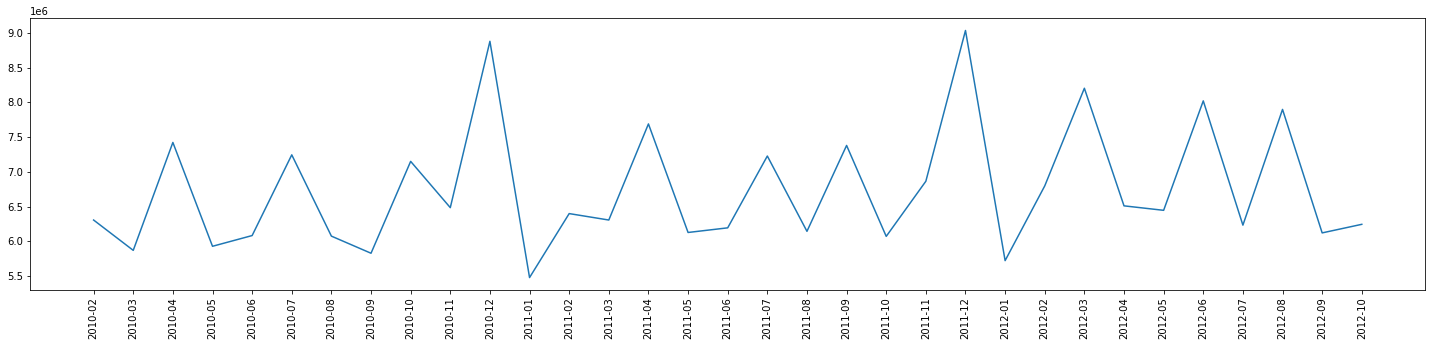

In [15]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
plt.plot(ts["Weekly_Sales"])

C:\Users\dhuy9\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


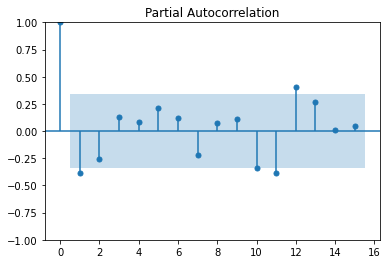

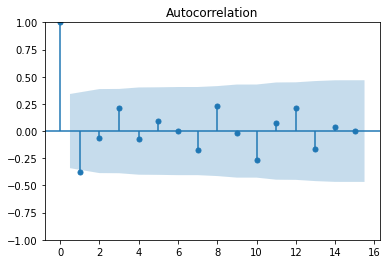

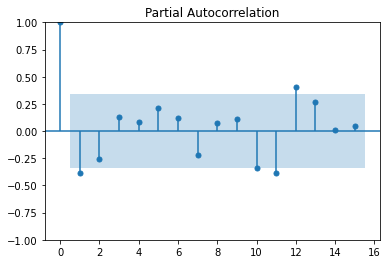

In [16]:
sm.graphics.tsa.plot_acf(ts, lags = 15)
sm.graphics.tsa.plot_pacf(ts, lags = 15)

In [17]:
X = ts.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    if result[0] > result[4]["5%"]:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")
    else:
         print ("Reject Ho - Time Series is Stationary")

ADF Statistic: -5.890718
p-value: 0.000000
Critical Values:
	1%: -3.661
Reject Ho - Time Series is Stationary
	5%: -2.961
Reject Ho - Time Series is Stationary
	10%: -2.619
Reject Ho - Time Series is Stationary


In [18]:
model = sm.tsa.arima.ARIMA(ts, order=(12,0,1),seasonal_order=(0,0,0,0))
result = model.fit()
print(result.summary())

C:\Users\dhuy9\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dhuy9\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dhuy9\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dhuy9\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                   33
Model:                ARIMA(12, 0, 1)   Log Likelihood                -489.064
Date:                Mon, 01 Aug 2022   AIC                           1008.128
Time:                        22:04:45   BIC                           1030.576
Sample:                    02-01-2010   HQIC                          1015.681
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.739e+06   2.58e+05     26.082      0.000    6.23e+06    7.25e+06
ar.L1         -0.2297      0.518     -0.443      0.658      -1.246       0.787
ar.L2          0.1433      0.469      0.305      0.7

### So after conducting tests, it is showed that the dataset is stationnary and with the help of ACF and PCF, ARIMA (12,0,1) is selected 

## Forecast Plotting and Error Analysis 

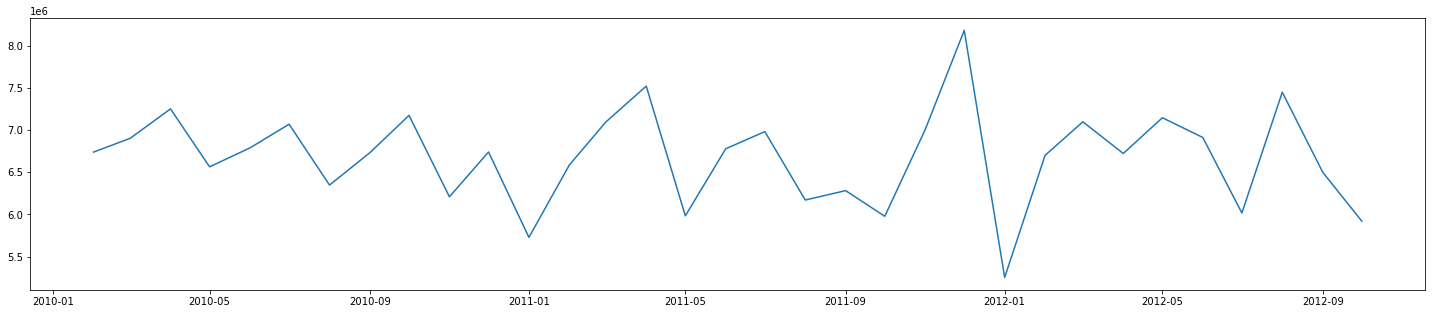

In [19]:
predict = result.predict()

plt.figure(figsize=(25,5))
plt.plot(predict)

In [21]:
predict = pd.DataFrame(predict)
predict

,predicted_mean
2010-02-01,6.739479e+06
2010-03-01,6.901651e+06
2010-04-01,7.250697e+06
2010-05-01,6.564514e+06
2010-06-01,6.788861e+06
2010-07-01,7.069240e+06
2010-08-01,6.348432e+06
2010-09-01,6.732543e+06
2010-10-01,7.173436e+06
2010-11-01,6.209681e+06


In [25]:
ts["Weekly_Sales_predict"] = predict["predicted_mean"]
ts["Error"] = ts["Weekly_Sales_predict"] - ts["Weekly_Sales"]
ts["%Error"] = ts["Error"] / ts["Weekly_Sales"]  * 100
pd.set_option('display.float_format', lambda x: '%.5f' % x)
ts["Holiday"] = df1["Holiday_Flag"]
ts

C:\Users\dhuy9\AppData\Local\Temp\ipykernel_6880\868888530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts["Weekly_Sales_predict"] = predict["predicted_mean"]
C:\Users\dhuy9\AppData\Local\Temp\ipykernel_6880\868888530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts["Error"] = ts["Weekly_Sales_predict"] - ts["Weekly_Sales"]
C:\Users\dhuy9\AppData\Local\Temp\ipykernel_6880\868888530.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,Weekly_Sales,Weekly_Sales_predict,Error,%Error,Holiday
Month_year,,,,,
2010-02,6307344.10000,6739479.05606,432134.95606,6.85130,1
2010-03,5871293.98000,6901651.42027,1030357.44027,17.54907,0
2010-04,7422801.92000,7250697.37386,-172104.54614,-2.31859,0
2010-05,5929938.64000,6564514.19979,634575.55979,10.70122,0
2010-06,6084081.46000,6788861.30830,704779.84830,11.58400,0
2010-07,7244483.04000,7069239.56755,-175243.47245,-2.41899,0
2010-08,6075952.95000,6348432.10613,272479.15613,4.48455,0
2010-09,5829793.92000,6732542.71209,902748.79209,15.48509,1
2010-10,7150641.75000,7173436.10063,22794.35063,0.31877,0


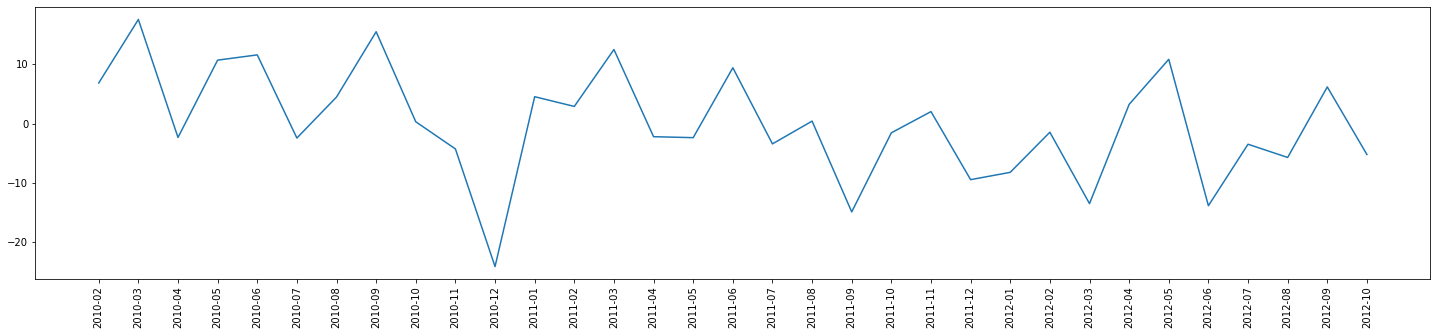

In [26]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
plt.plot(ts["%Error"])

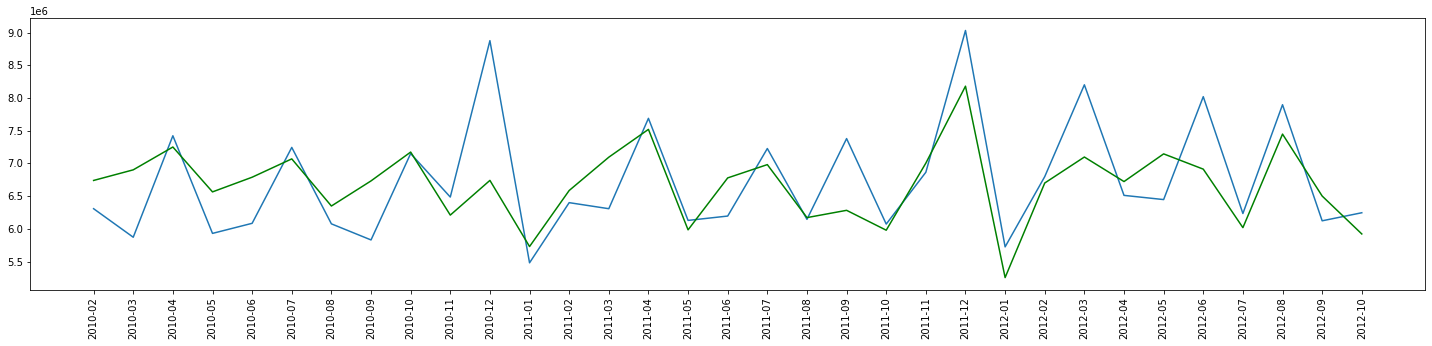

In [27]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
plt.plot(ts["Weekly_Sales"])
plt.plot(ts["Weekly_Sales_predict"], color = "green")

In [28]:
ts["Error"].abs().sum()/ts["Weekly_Sales"].sum() * 100

7.37033924180478

In [29]:
ts["Error"].abs().sum()

16391841.495547622

### Overall, It is shown that the forecast generated by model has an abs error of 1,6 millions unity, representing 7,4% of True Value Weekly_Sales. From a personal point of view, it is acceptable but if digging deeper into the errors, we see that there is a huge gap in 12/2010, it is possible that there was a special event happening in this period (or the previous period) that caused a huge pic of Sales (huge promotion for Xmas,etc.). 

### On the other hand, it is constated that 1 year later, there is also a pic of Sales in 12/2011 but this time, the model does a better job. So we might suggest that in 12/2010, the model performed poorly because it didnt have enough history to lean on. 

### This gives us a good example of why human role is always needed in forecasting activities : 

### 1/ For cases that we dont have enough of history for the dataset
### 2/ Even when the history is abundant, History will never repeat itself at 100% the same, human intelligence is therefore required in order to fill the x% of difference by adding his/her real life experiences and adjusting the basline forecast


